# RQ1 - Influence of the programming style on the performance of the participants

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
df = pd.read_csv('./data/preprocessed_experiment_data.csv')
df = df[df["Outlier"] == False]
df

,ID,ProgrammingStyle,Algorithm,ResponseTime,Correctness,ClickData,TimeData,Outlier
0,212,iterative,apply,66794,False,268-191 151-70 151-70 146-89 135-12 135-65 120...,10105 34435 35005 39192 47146 56587 61358 66794,False
1,245,iterative,apply,21078,True,156-17 174-195 129-44 131-62 141-93 141-114 14...,1123 3472 14145 14878 16035 19911 21078,False
2,272,iterative,apply,81561,True,188-192 104-34 132-69 149-89,16519 78023 79043 81561,False
3,296,iterative,apply,22825,False,160-195 122-115 148-9 138-34 140-60 132-94 153...,4194 11386 13568 14369 15567 17215 21808 22825,False
4,302,iterative,apply,20310,True,69-204 84-191 150-197 254-200 183-14 85-36 95-...,4193 5008 5850 6351 8856 10441 11790 13309 20310,False
...,...,...,...,...,...,...,...,...
323,213,list-comprehension,LinkedList,153552,False,42-22 65-45 51-123 81-143 111-161 100-143 50-1...,4155 9379 12561 13652 21857 23971 25078 25989 ...,False
324,252,list-comprehension,LinkedList,47933,True,110-12 118-37 101-117 126-142 134-170 137-190 ...,3853 4218 8660 9020 9434 9893 11026 11335 1200...,False
326,297,list-comprehension,LinkedList,48782,True,80-9 90-33 88-125 103-146 109-170 114-194 103-...,3545 4213 6711 7143 7700 8598 9962 10333 11843...,False
327,309,list-comprehension,LinkedList,55439,False,78-15 80-37 81-117 109-146 106-170 106-192 114...,3924 4856 5841 6974 7497 8040 10490 11359 1325...,False


## Descriptive Statistics

### Correctness Ratio

In [3]:
df_iterative = pd.DataFrame([], columns=["ProgrammingStyle", "Algorithm", "NumberOfCorrect", "NumberOfTotal"])
df_recursive = pd.DataFrame([], columns=["ProgrammingStyle", "Algorithm", "NumberOfCorrect", "NumberOfTotal"])
df_higher_order = pd.DataFrame([], columns=["ProgrammingStyle", "Algorithm", "NumberOfCorrect", "NumberOfTotal"])
df_list_comprehension = pd.DataFrame([], columns=["ProgrammingStyle", "Algorithm", "NumberOfCorrect", "NumberOfTotal"])

for algorithm in df["Algorithm"].unique():
    df_algo_tmp = df[df["Algorithm"] == algorithm]

    df_iter_tmp = df_algo_tmp[df_algo_tmp["ProgrammingStyle"] == "iterative"]
    df_rec_tmp = df_algo_tmp[df_algo_tmp["ProgrammingStyle"] == "recursive"]
    df_higher_order_tmp = df_algo_tmp[df_algo_tmp["ProgrammingStyle"] == "higher-order"]
    df_list_comprehension_tmp = df_algo_tmp[df_algo_tmp["ProgrammingStyle"] == "list-comprehension"]

    iter_correct = len(df_iter_tmp[df_iter_tmp["Correctness"] == True])
    iter_total = len(df_iter_tmp)
    rec_correct = len(df_rec_tmp[df_rec_tmp["Correctness"] == True])
    rec_total = len(df_rec_tmp)
    higher_order_correct = len(df_higher_order_tmp[df_higher_order_tmp["Correctness"] == True])
    higher_order_total = len(df_higher_order_tmp)
    list_comprehension_correct = len(df_list_comprehension_tmp[df_list_comprehension_tmp["Correctness"] == True])
    list_comprehension_total = len(df_list_comprehension_tmp)

    df_iterative = df_iterative.append({"ProgrammingStyle": "iterative", "Algorithm": algorithm, "NumberOfCorrect": iter_correct, "NumberOfTotal": iter_total}, ignore_index=True)
    df_recursive = df_recursive.append({"ProgrammingStyle": "recursive", "Algorithm": algorithm, "NumberOfCorrect": rec_correct, "NumberOfTotal": rec_total}, ignore_index=True)
    df_higher_order = df_higher_order.append({"ProgrammingStyle": "higher order", "Algorithm": algorithm, "NumberOfCorrect": higher_order_correct, "NumberOfTotal": higher_order_total}, ignore_index=True)
    df_list_comprehension = df_list_comprehension.append({"ProgrammingStyle": "list comprehension", "Algorithm": algorithm, "NumberOfCorrect": list_comprehension_correct, "NumberOfTotal": list_comprehension_total}, ignore_index=True)

df_iterative = df_iterative.append({"ProgrammingStyle": "iterative", "Algorithm": "total", "NumberOfCorrect": df_iterative["NumberOfCorrect"].sum(), "NumberOfTotal": df_iterative["NumberOfTotal"].sum()}, ignore_index=True)
df_recursive = df_recursive.append({"ProgrammingStyle": "recursive", "Algorithm": "total", "NumberOfCorrect": df_recursive["NumberOfCorrect"].sum(), "NumberOfTotal": df_recursive["NumberOfTotal"].sum()}, ignore_index=True)
df_higher_order = df_higher_order.append({"ProgrammingStyle": "higher order", "Algorithm": "total", "NumberOfCorrect": df_higher_order["NumberOfCorrect"].sum(), "NumberOfTotal": df_higher_order["NumberOfTotal"].sum()}, ignore_index=True)
df_list_comprehension = df_list_comprehension.append({"ProgrammingStyle": "list comprehension", "Algorithm": "total", "NumberOfCorrect": df_list_comprehension["NumberOfCorrect"].sum(), "NumberOfTotal": df_list_comprehension["NumberOfTotal"].sum()}, ignore_index=True)

# merge dataframes to one
df_correctness_ratio = df_iterative
df_correctness_ratio = df_correctness_ratio.append(df_recursive)
df_correctness_ratio = df_correctness_ratio.append(df_higher_order)
df_correctness_ratio = df_correctness_ratio.append(df_list_comprehension)
df_correctness_ratio["Ratio"] = df_correctness_ratio["NumberOfCorrect"] / df_correctness_ratio["NumberOfTotal"]

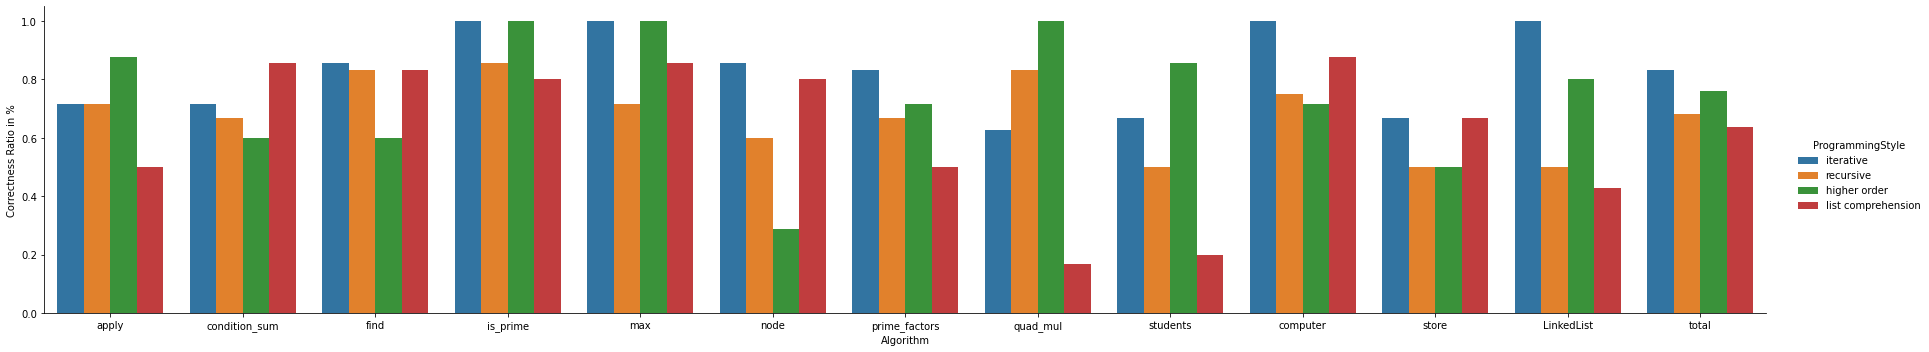

In [4]:
ax = sns.catplot(x="Algorithm", y="Ratio", hue="ProgrammingStyle", data=df_correctness_ratio, kind="bar", height=5, aspect=5)
ax.tight_layout()
ax.set(ylabel='Correctness Ratio in %');

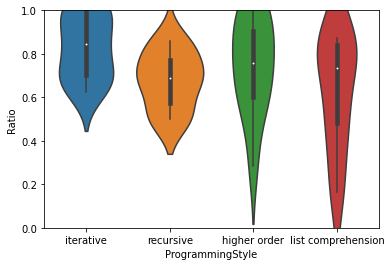

In [5]:
df_tmp = df_correctness_ratio[["ProgrammingStyle", "Algorithm", "Ratio"]]
df_tmp = df_tmp[df_tmp["Algorithm"] != "total"]
df_tmp["Ratio"] = df_tmp["Ratio"].astype(float)
ax = sns.violinplot(x="ProgrammingStyle", y="Ratio", data=df_tmp)
ax.set(ylim=(0.0, 1.0));

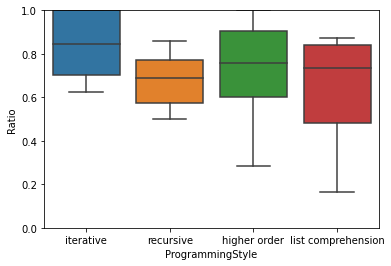

In [6]:
df_tmp = df_correctness_ratio[["ProgrammingStyle", "Algorithm", "Ratio"]]
df_tmp = df_tmp[df_tmp["Algorithm"] != "total"]
df_tmp["Ratio"] = df_tmp["Ratio"].astype(float)
ax = sns.boxplot(x="ProgrammingStyle", y="Ratio", data=df_tmp)
ax.set(ylim=(0.0, 1.0));

### Response Time Data

In [7]:
df_response_time = df[["Algorithm","ProgrammingStyle", "ResponseTime"]]
df_response_time["ResponseTime"] = df_response_time["ResponseTime"].astype(float).apply(lambda x : x/1000.)

display(df_response_time.groupby(["ProgrammingStyle", "Algorithm"]).describe())
display(df_response_time.groupby("ProgrammingStyle").describe())

<ipython-input-7-8b996c90c73d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_response_time["ResponseTime"] = df_response_time["ResponseTime"].astype(float).apply(lambda x : x/1000.)


ResponseTime                                  \
                                        count        mean         std     min   
ProgrammingStyle   Algorithm                                                    
higher-order       LinkedList             5.0   99.212200   64.048072  39.427   
                   apply                  8.0   12.051125   13.781719   4.797   
                   computer               7.0   94.314857   57.625112  36.792   
                   condition_sum          5.0   40.582000   38.574977  13.308   
                   find                   5.0   85.923600   49.524879  29.396   
                   is_prime               7.0   44.046429   29.146881  10.500   
                   max                    8.0   19.550500    9.316866   6.642   
                   node                   7.0   62.491000   41.027570  14.413   
                   prime_factors          7.0   92.200286   71.140110  28.030   
                   quad_mul               5.0   38.689200   43.672944  11.007   
                   store                  4.0   82.593500   17.162195  65.091   
                   students               7.0   68.789714   66.011220   9.874   
iterative          LinkedList             6.0   62.200333   28.067373  31.585   
                   apply                  7.0   33.347857   28.656270   9.307   
                   computer               5.0   78.451400   44.854419  35.737   
                   condition_sum          7.0   37.864714   24.038318  14.922   
                   find                   7.0   18.890429    7.885119   7.266   
                   is_prime               9.0   39.973111   29.190073  12.344   
                   max                    6.0   31.476667   18.589396  13.618   
                   node                   7.0   70.347714   48.674644  25.672   
                   prime_factors          6.0   67.874667   62.469240  33.760   
                   quad_mul               8.0   40.629000   30.758335  16.065   
                   store                  6.0  110.478000   51.677056  61.393   
                   students               3.0   36.841667   11.274513  27.615   
list-comprehension LinkedList             7.0   68.399571   38.787012  41.878   
                   apply                  6.0   49.784500   77.394027   4.491   
                   computer               8.0   66.471375   50.253177  25.349   
                   condition_sum          7.0   42.076714   31.042255  15.617   
                   find                   6.0   28.040333   23.724237   7.287   
                   is_prime               5.0    5.464600    2.380315   2.943   
                   max                    7.0   26.035857   20.455295   8.526   
                   node                   5.0  117.274600  134.208805  24.496   
                   prime_factors          6.0   95.462500  109.898831  14.014   
                   quad_mul               6.0   41.501667   17.731662  18.849   
                   store                  6.0  112.985833   68.735197  50.283   
                   students               5.0    8.592600    3.248279   5.869   
recursive          LinkedList             6.0   63.851167   44.999959  15.750   
                   apply                  7.0   37.177286   24.026331  11.356   
                   computer               4.0   82.719750   48.663749  31.652   
                   condition_sum          6.0   31.716000   20.301535   9.720   
                   find                   6.0   51.573000   40.636461  14.406   
                   is_prime               7.0   38.932143   33.073185   9.019   
                   max                    7.0   48.316286   24.807067  17.183   
                   node                   5.0  105.518200   99.837839  43.857   
                   prime_factors          6.0  126.131833   89.458151  57.200   
                   quad_mul               6.0   18.845333   18.490714   7.893   
                   store                  6.0   88.166500   25.3

ResponseTime                                         \
                          count       mean        std    min       25%   
ProgrammingStyle                                                         
higher-order               75.0  59.174907  52.090916  4.797  18.95950   
iterative                  77.0  51.206558  41.163339  7.266  21.43000   
list-comprehension         74.0  55.549514  65.462259  2.943  15.65500   
recursive                  72.0  59.123514  52.512650  7.893  23.38025   

                                                
                        50%       75%      max  
ProgrammingStyle                                
higher-order        38.3620  80.88400  215.009  
iterative           36.3870  68.90600  195.274  
list-comprehension  33.9995  58.57450  331.647  
recursive           47.4425  76.76475  289.703

In [8]:
ylim = (0.0, 150.0)

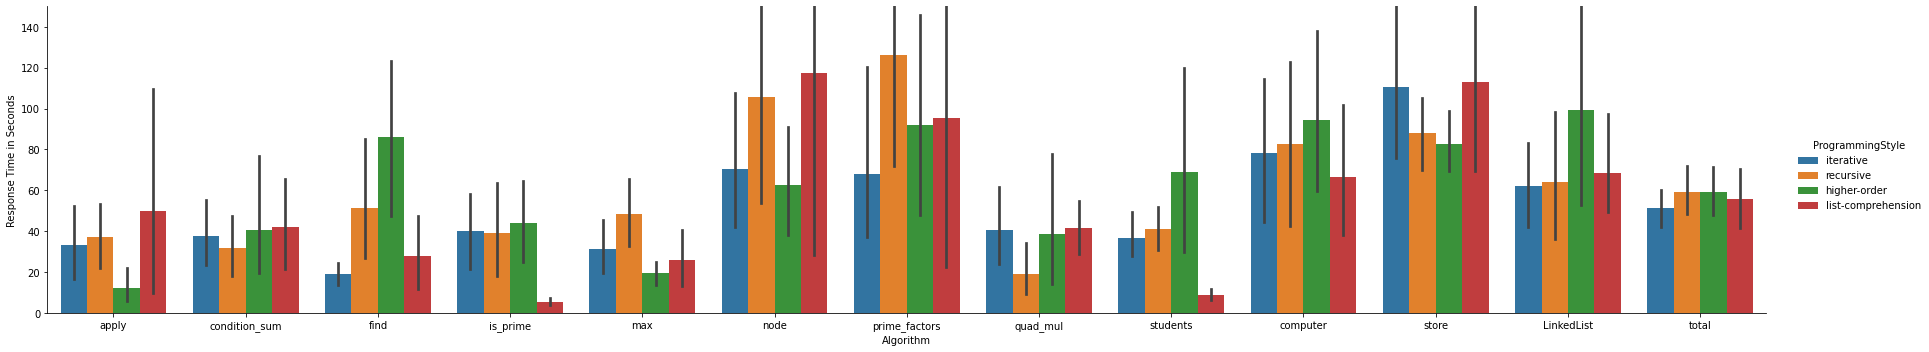

In [9]:
df_tmp = df_response_time.copy()
df_tmp_2 = df_tmp.copy()
df_tmp_2["Algorithm"] = "total"
df_tmp = df_tmp.append(df_tmp_2)
ax = sns.catplot(x="Algorithm", y="ResponseTime", hue="ProgrammingStyle", data=df_tmp, kind="bar", height=5, aspect=5)
ax.tight_layout()
ax.set(ylim=ylim)
ax.set(ylabel='Response Time in Seconds');

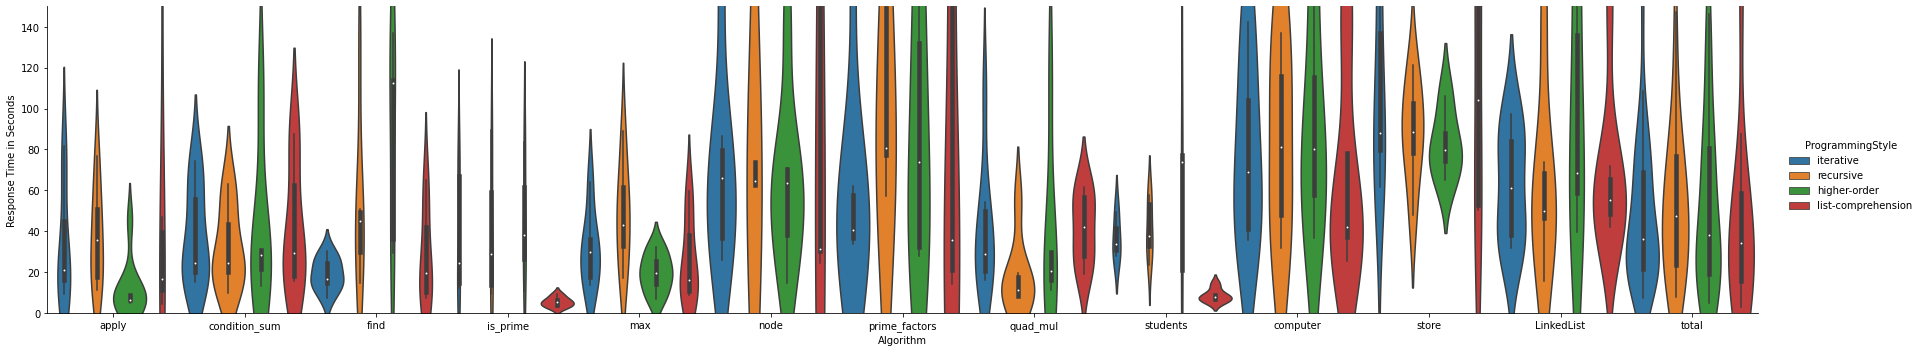

In [10]:
ax = sns.catplot(x="Algorithm", y="ResponseTime", hue="ProgrammingStyle", data=df_tmp, kind="violin", width=1, height=5, aspect=5)
ax.tight_layout()
ax.set(ylabel='Response Time in Seconds')
ax.set(ylim=ylim);

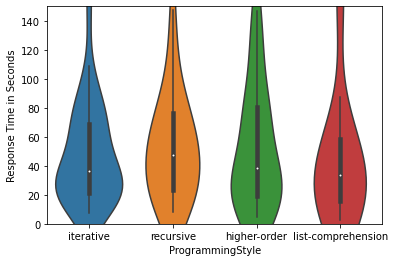

In [11]:
ax = sns.violinplot(x="ProgrammingStyle", y="ResponseTime", data=df_response_time)
ax.set(ylabel='Response Time in Seconds')
ax.set(ylim=ylim);

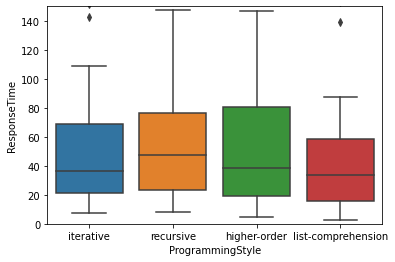

In [12]:
ax = sns.boxplot(x="ProgrammingStyle", y="ResponseTime", data=df_response_time)
ax.set(ylim=ylim);

## Inferential Statistics

### Correctness Ratio

In [24]:
# apply chi square test to see if there is a significant difference between programming styles
display(df_correctness_ratio[df_correctness_ratio["Algorithm"]=="total"])
stats.chisquare(df_correctness_ratio[df_correctness_ratio["Algorithm"]=="total"]["NumberOfCorrect"])

,ProgrammingStyle,Algorithm,NumberOfCorrect,NumberOfTotal,Ratio
12,iterative,total,64,77,0.831169
12,recursive,total,49,72,0.680556
12,higher order,total,57,75,0.76
12,list comprehension,total,47,74,0.635135


Power_divergenceResult(statistic=3.368663594470046, pvalue=0.3381997168328316)

### Response Time Data

In [25]:
# check if data is normal distributed
print("Iterative:", stats.shapiro(df_response_time[df_response_time["ProgrammingStyle"]=="iterative"]["ResponseTime"]))
print("Recursive:", stats.shapiro(df_response_time[df_response_time["ProgrammingStyle"]=="recursive"]["ResponseTime"]))
print("Higher Order:", stats.shapiro(df_response_time[df_response_time["ProgrammingStyle"]=="higher-order"]["ResponseTime"]))
print("List Comprehension:", stats.shapiro(df_response_time[df_response_time["ProgrammingStyle"]=="list-comprehension"]["ResponseTime"]))

Iterative: ShapiroResult(statistic=0.8222851753234863, pvalue=3.3256281284366196e-08)
Recursive: ShapiroResult(statistic=0.7595677375793457, pvalue=1.6203451913554545e-09)
Higher Order: ShapiroResult(statistic=0.8590255975723267, pvalue=6.499978439933329e-07)
List Comprehension: ShapiroResult(statistic=0.7169045209884644, pvalue=1.2011153183166812e-10)


#### Find out distribution of response time

In [26]:
fitter_iterative = Fitter(df_response_time[df_response_time["ProgrammingStyle"]=="iterative"]["ResponseTime"].array, distributions=get_common_distributions())
fitter_iterative.fit()
fitter_recursive = Fitter(df_response_time[df_response_time["ProgrammingStyle"]=="recursive"]["ResponseTime"].array, distributions=get_common_distributions())
fitter_recursive.fit()
fitter_higher_order = Fitter(df_response_time[df_response_time["ProgrammingStyle"]=="higher-order"]["ResponseTime"].array, distributions=get_common_distributions())
fitter_higher_order.fit()
fitter_list_comprehension = Fitter(df_response_time[df_response_time["ProgrammingStyle"]=="list-comprehension"]["ResponseTime"].array, distributions=get_common_distributions())
fitter_list_comprehension.fit()
fitter_total = Fitter(df_response_time["ResponseTime"].array, distributions=get_common_distributions())
fitter_total.fit()

,sumsquare_error,aic,bic,kl_div
lognorm,0.004129,1209.187005,-744.155765,inf
gamma,0.004202,1196.818968,-742.791669,inf
chi2,0.004202,1196.818965,-742.791640,inf
expon,0.004446,1188.436491,-742.793756,inf
exponpow,0.004918,1173.221744,-730.681898,inf


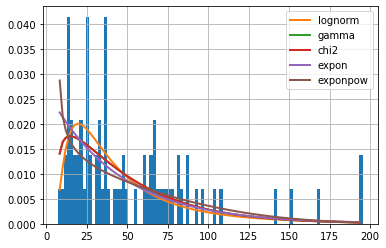

In [28]:
display(fitter_iterative.summary())

,sumsquare_error,aic,bic,kl_div
exponpow,0.001488,1387.267227,-763.838293,inf
expon,0.001497,1341.349387,-767.680591,inf
chi2,0.001511,1315.975120,-762.731448,inf
lognorm,0.001763,1347.403892,-751.627533,inf
rayleigh,0.002006,1483.700851,-746.592031,inf


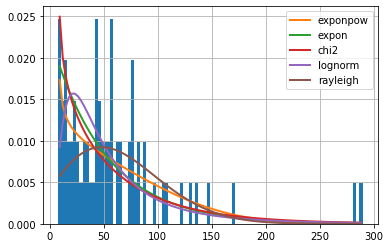

In [29]:
display(fitter_recursive.summary())

,sumsquare_error,aic,bic,kl_div
exponpow,0.003317,1151.127262,-739.013364,inf
chi2,0.003346,1205.343773,-738.362620,inf
gamma,0.003353,1204.172190,-738.212692,inf
expon,0.003477,1189.767706,-739.793909,inf
lognorm,0.003848,1213.501980,-727.883909,inf


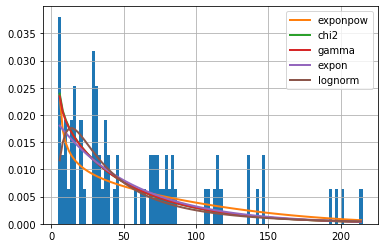

In [30]:
display(fitter_higher_order.summary())

,sumsquare_error,aic,bic,kl_div
chi2,0.001227,1405.631886,-801.641008,inf
gamma,0.001263,1469.611347,-799.512393,inf
lognorm,0.001275,1401.871266,-798.760934,inf
expon,0.001310,1421.403162,-801.070894,inf
exponpow,0.001354,1394.749806,-794.333456,inf


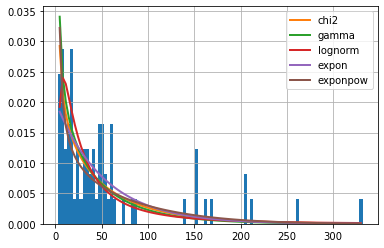

In [31]:
display(fitter_list_comprehension.summary())

,sumsquare_error,aic,bic,kl_div
chi2,0.000350,1437.962219,-4052.164332,inf
gamma,0.000352,1608.468362,-4050.685305,inf
expon,0.000410,1416.203462,-4010.574853,inf
exponpow,0.000618,1582.880030,-3882.764642,inf
cauchy,0.000830,1484.758227,-3800.286721,inf


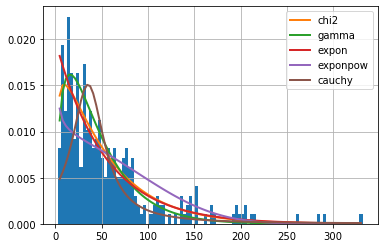

In [32]:
display(fitter_total.summary())

#### Compare values of response time distribution

count     77.000000
mean      51.206558
std       41.163339
min        7.266000
25%       21.430000
50%       36.387000
75%       68.906000
max      195.274000
Name: ResponseTime, dtype: float64